In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
csv_path = 'output_percentage_values.csv'
df = pd.read_csv(csv_path)
df

,date,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,Unnamed: 0
0,2018-01-01,0.017251,0.0,0.008626,4.192022,0.000000,0.0,3.795246,0.004313,0.004313,...,0.077630,0.021564,0.017251,1.203266,7.443858,9.902143,22.974179,21.305134,0.185450,NaN
1,2018-01-02,0.017124,0.0,0.004281,1.875056,0.000000,0.0,1.481209,0.012843,0.008562,...,0.008562,0.000000,0.004281,0.633581,7.388920,12.941312,19.110162,19.816518,0.107024,NaN
2,2018-01-03,0.003816,0.0,0.007631,1.926870,0.000000,0.0,1.671226,0.015262,0.011447,...,0.015262,0.019078,0.003816,0.545629,6.421630,13.018776,18.967274,20.623238,0.068681,NaN
3,2018-01-04,0.008374,0.0,0.016747,1.925911,0.000000,0.0,2.620914,0.008374,0.000000,...,0.033494,0.025121,0.000000,1.180667,4.220257,11.915528,19.761522,17.366693,0.125603,NaN
4,2018-01-05,0.011516,0.0,0.000000,2.111227,0.000000,0.0,2.065164,0.007677,0.007677,...,0.023032,0.007677,0.003839,0.809943,5.869211,12.172184,20.824377,18.966497,0.145867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-12-27,0.012386,0.0,0.037157,0.470658,0.000000,0.0,0.557358,0.000000,0.000000,...,0.024771,0.074314,0.037157,0.148629,6.180485,11.865540,17.389581,17.414353,0.123857,NaN
1822,2022-12-28,0.047994,0.0,0.011999,0.311964,0.023997,0.0,0.371957,0.011999,0.047994,...,0.000000,0.035996,0.035996,0.191978,6.935196,11.242696,19.305761,15.334221,0.095989,NaN
1823,2022-12-29,0.011410,0.0,0.011410,0.661768,0.011410,0.0,0.422162,0.000000,0.000000,...,0.000000,0.079869,0.000000,0.114098,6.708959,11.820547,19.236913,15.323354,0.125508,NaN
1824,2022-12-30,0.011613,0.0,0.000000,0.940646,0.023226,0.0,0.476130,0.000000,0.011613,...,0.000000,0.046452,0.011613,0.185807,6.456783,12.030983,20.601317,14.400019,0.232258,NaN


In [ ]:
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,date,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,Unnamed: 0
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01,0.017251,0.0,0.008626,4.192022,0.000000,0.0,3.795246,0.004313,0.004313,...,0.077630,0.021564,0.017251,1.203266,7.443858,9.902143,22.974179,21.305134,0.185450,NaN
2018-01-02,2018-01-02,0.017124,0.0,0.004281,1.875056,0.000000,0.0,1.481209,0.012843,0.008562,...,0.008562,0.000000,0.004281,0.633581,7.388920,12.941312,19.110162,19.816518,0.107024,NaN
2018-01-03,2018-01-03,0.003816,0.0,0.007631,1.926870,0.000000,0.0,1.671226,0.015262,0.011447,...,0.015262,0.019078,0.003816,0.545629,6.421630,13.018776,18.967274,20.623238,0.068681,NaN
2018-01-04,2018-01-04,0.008374,0.0,0.016747,1.925911,0.000000,0.0,2.620914,0.008374,0.000000,...,0.033494,0.025121,0.000000,1.180667,4.220257,11.915528,19.761522,17.366693,0.125603,NaN
2018-01-05,2018-01-05,0.011516,0.0,0.000000,2.111227,0.000000,0.0,2.065164,0.007677,0.007677,...,0.023032,0.007677,0.003839,0.809943,5.869211,12.172184,20.824377,18.966497,0.145867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022-12-27,0.012386,0.0,0.037157,0.470658,0.000000,0.0,0.557358,0.000000,0.000000,...,0.024771,0.074314,0.037157,0.148629,6.180485,11.865540,17.389581,17.414353,0.123857,NaN
2022-12-28,2022-12-28,0.047994,0.0,0.011999,0.311964,0.023997,0.0,0.371957,0.011999,0.047994,...,0.000000,0.035996,0.035996,0.191978,6.935196,11.242696,19.305761,15.334221,0.095989,NaN
2022-12-29,2022-12-29,0.011410,0.0,0.011410,0.661768,0.011410,0.0,0.422162,0.000000,0.000000,...,0.000000,0.079869,0.000000,0.114098,6.708959,11.820547,19.236913,15.323354,0.125508,NaN


<Axes: xlabel='date'>

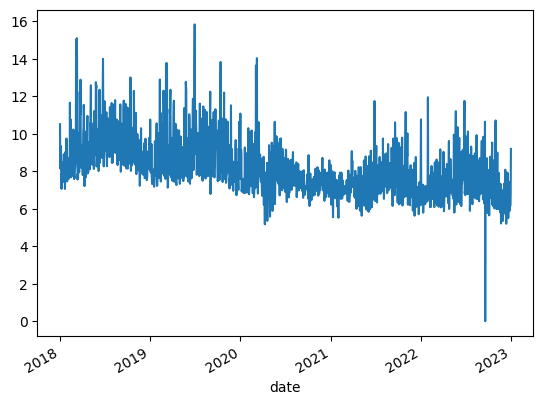

In [ ]:
density = df['50']
density.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(density, WINDOW_SIZE)
X1.shape, y1.shape

((1825, 1, 1), (1825,))

In [ ]:


X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1600], y1[1500:1600]
X_test1, y_test1 = X1[1600:], y1[1600:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 1, 1), (1500,), (100, 1, 1), (100,), (225, 1, 1), (225,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((1, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
47/47 [==============================] - 8s 137ms/step - loss: 1.3225 - root_mean_squared_error: 1.1500 - val_loss: 0.9609 - val_root_mean_squared_error: 0.9803
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: 1.3222 - root_mean_squared_error: 1.1499 - val_loss: 0.9650 - val_root_mean_squared_error: 0.9823
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 1.3219 - root_mean_squared_error: 1.1497 - val_loss: 0.9673 - val_root_mean_squared_error: 0.9835
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 1.3214 - root_mean_squared_error: 1.1495 - val_loss: 0.9669 - val_root_mean_squared_error: 0.9833
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 1.3211 - root_mean_squared_error: 1.1494 - val_loss: 0.9694 - val_root_mean_squared_error: 0.9846
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 1.3208 - root_mean_squared_error: 1.1492 - val_loss: 0.9695 - val_root_mean_

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results


47/47 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,9.343983,8.155210
1,8.278575,8.981887
2,8.698166,8.289791
3,8.350715,9.339301
4,8.863110,7.526208
...,...,...
1495,7.695769,7.767948
1496,8.062146,7.298911
1497,7.781586,6.086619
1498,6.954351,6.709449


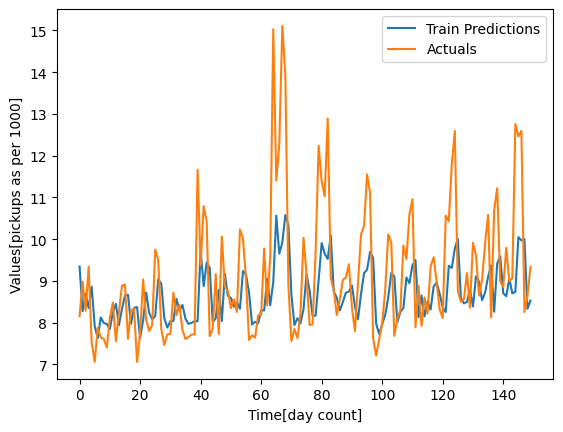

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][:150], label='Train Predictions')
plt.plot(train_results['Actuals'][:150], label='Actuals')
plt.xlabel("Time[day count]")
plt.ylabel("Values[pickups as per 1000]")
plt.legend()
plt.show()


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

4/4 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,7.152301,6.097677
1,6.962603,7.198863
2,7.719012,8.017697
3,8.203246,8.285053
4,8.348202,6.958447
...,...,...
95,8.991248,5.794458
96,6.731472,6.910323
97,7.532980,6.613791
98,7.332950,7.164034


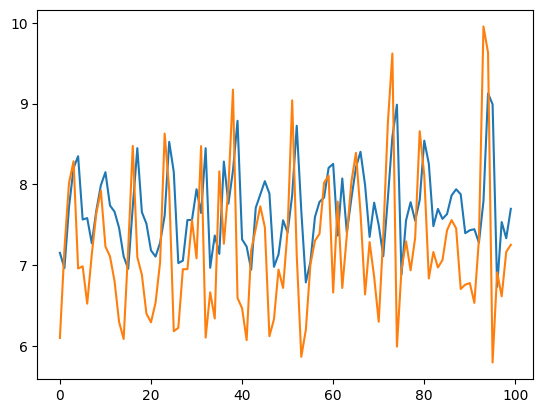

In [ ]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

8/8 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,7.752106,10.053892
1,9.166059,11.209766
2,9.589379,6.364756
3,7.157826,6.223974
4,7.055887,7.284272
...,...,...
220,6.808764,6.589214
221,7.315959,6.131289
222,6.987598,6.286797
223,7.101641,6.793557


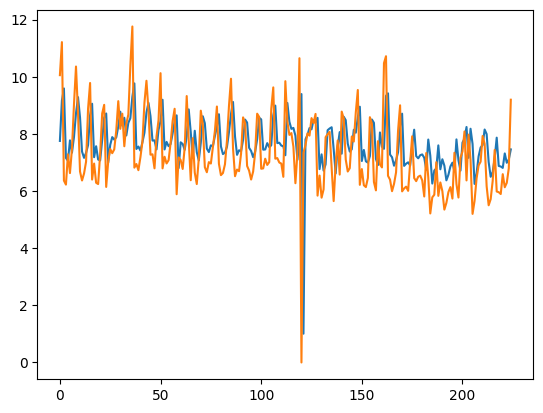

In [ ]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])